In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

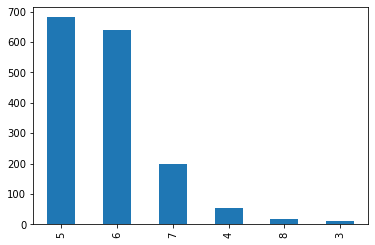

In [10]:
df['quality'].value_counts().plot.bar()

<AxesSubplot:>

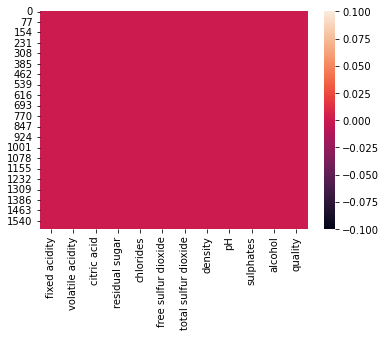

In [11]:
sns.heatmap(df.isnull())

In [12]:
for i in df['quality']:
    if i<7:
        df['quality']=df['quality'].replace(i,'0').astype(int)
    elif i>=7:
        df['quality']=df['quality'].replace(i,'1').astype(int)

Text(0.5, 1.0, 'Wine Quality')

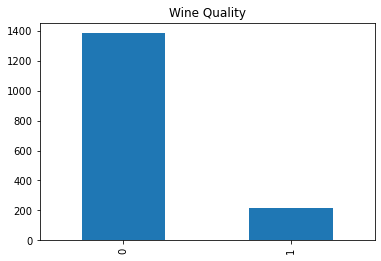

In [14]:
df['quality'].value_counts().plot.bar()
plt.title('Wine Quality')

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

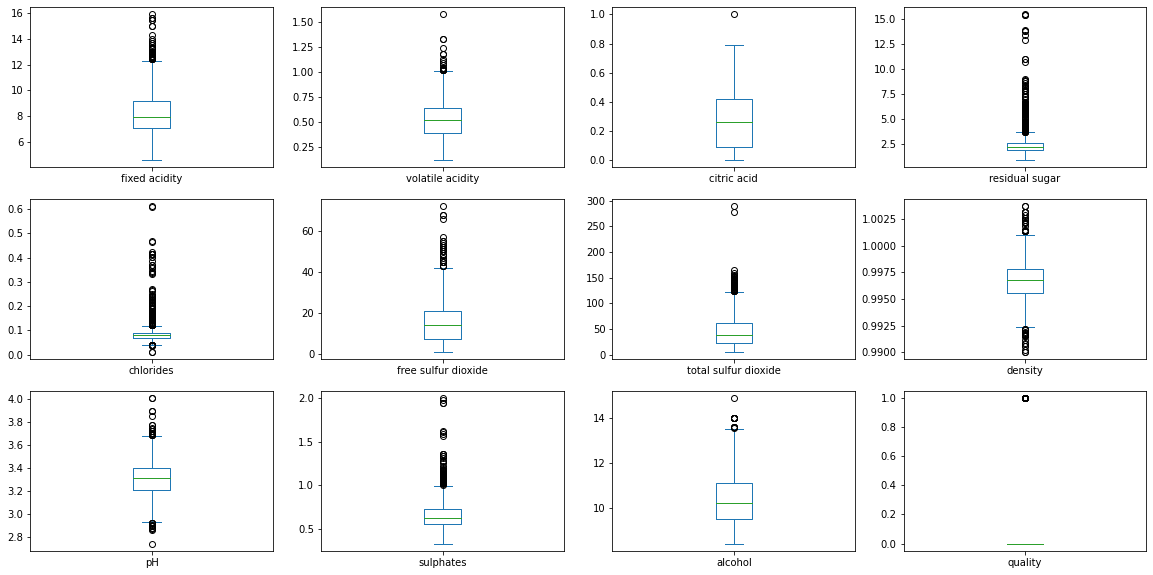

In [16]:
df.plot(kind='box', subplots= True, layout=(3,4), figsize=(20,10))

In [17]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [18]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(df))
dff=df[(z<3).all(axis=1)]

In [51]:
dff.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,0


In [52]:
dff.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.296566,0.699747,0.175809,0.187853,-0.146702,-0.098843,0.660497,-0.704507,0.200796,-0.018384,0.124746
volatile acidity,-0.296566,1.000000,-0.589286,0.032331,0.070307,0.008824,0.104585,-0.000446,0.252900,-0.350547,-0.212767,-0.268236
citric acid,0.699747,-0.589286,1.000000,0.178784,0.104950,-0.072097,0.007320,0.372338,-0.521270,0.303401,0.164420,0.226809
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,-0.005795,0.091381,0.343236,-0.072787,0.071218,0.162423,0.115612
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,-0.057342,0.040874,0.330104,-0.183105,0.025329,-0.209711,-0.112431
free sulfur dioxide,-0.146702,0.008824,-0.072097,-0.005795,-0.057342,1.000000,0.660348,-0.039334,0.107444,0.059713,-0.076400,-0.085448
total sulfur dioxide,-0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,-0.007726,-0.037164,-0.257834,-0.171294
density,0.660497,-0.000446,0.372338,0.343236,0.330104,-0.039334,0.116386,1.000000,-0.311217,0.127562,-0.469611,-0.154221
pH,-0.704507,0.252900,-0.521270,-0.072787,-0.183105,0.107444,-0.007726,-0.311217,1.000000,-0.039558,0.136659,-0.079528
sulphates,0.200796,-0.350547,0.303401,0.071218,0.025329,0.059713,-0.037164,0.127562,-0.039558,1.000000,0.240684,0.310206


<AxesSubplot:>

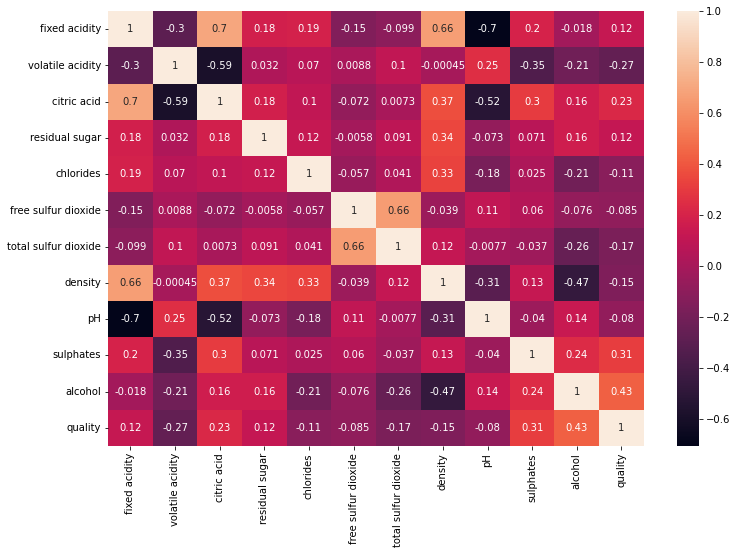

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)

In [56]:
dfff=dff.drop(columns=['free sulfur dioxide'], axis=1)

In [57]:
dfff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,0


<AxesSubplot:>

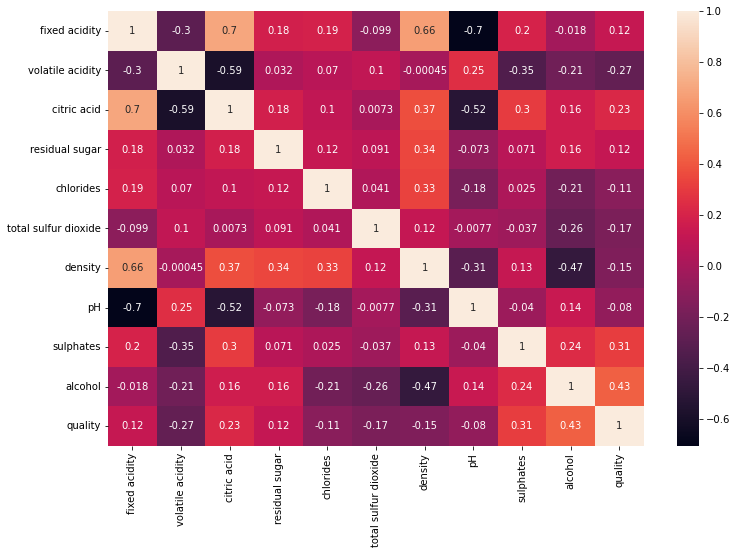

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(dfff.corr(),annot=True)

In [59]:
import statsmodels.api as stat
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['vif Factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [60]:
calc_vif(dfff)

,Variables,vif Factor
0,fixed acidity,88.750271
1,volatile acidity,19.304722
2,citric acid,9.170097
3,residual sugar,9.837376
4,chlorides,17.837698
5,total sulfur dioxide,3.800363
6,density,1682.612617
7,pH,1240.928982
8,sulphates,32.828062
9,alcohol,156.534925


In [29]:
dffff=dfff.drop(['density'],axis=1)

In [61]:
dffff.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0


In [62]:
x= dffff.drop(['quality'],axis=1)

In [63]:
y= dffff['quality']

In [33]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1458, dtype: int32

In [34]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [37]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (1020, 9)
x_test: (438, 9)
y_train: (1020,)
y_test: (438,)


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [39]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

In [40]:
for i in models:
    i.fit(x_train,y_train)
    predm=i.predict(x_test)
    print(f'accuracy score of {i}:',accuracy_score(y_test,predm))
    print(f'confusion matrix of {i}:\n',confusion_matrix(y_test,predm))
    print(f'classification report of {i}:\n',classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression(): 0.8698630136986302
confusion matrix of LogisticRegression():
 [[360  15]
 [ 42  21]]
classification report of LogisticRegression():
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       375
           1       0.58      0.33      0.42        63

    accuracy                           0.87       438
   macro avg       0.74      0.65      0.68       438
weighted avg       0.85      0.87      0.85       438



accuracy score of SVC(): 0.8721461187214612
confusion matrix of SVC():
 [[367   8]
 [ 48  15]]
classification report of SVC():
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       375
           1       0.65      0.24      0.35        63

    accuracy                           0.87       438
   macro avg       0.77      0.61      0.64       438
weighted avg       0.85      0.87      0.85       438



accuracy score of DecisionTreeClassifier(

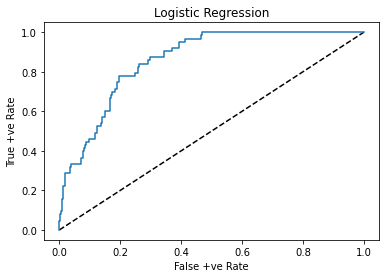

auc-score for Logistic Regression:  0.6466666666666666


In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc-score for Logistic Regression: ",auc_score)

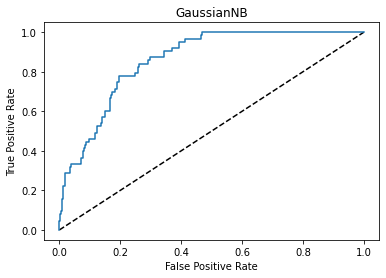

auc-score for GaussianNB:  0.6466666666666666


In [42]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc-score for GaussianNB: ",auc_score)

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
inputs={'var_smoothing':np.logspace(0,-9,num=100)}
grid=GridSearchCV(GaussianNB(),inputs,cv=5)
grid.fit(x,y)
print(grid)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})


In [45]:
print('Best Score: ',grid.best_score_)
print('Best Estimator: ',grid.best_estimator_)
print('Best parameters: ',grid.best_params_)

Best Score:  0.8662594737089865
Best Estimator:  GaussianNB(var_smoothing=0.657933224657568)
Best parameters:  {'var_smoothing': 0.657933224657568}


In [ ]:
gnb=GaussianNB(var_smoothing=1.0)
gnb.fit(x,y)
pred=gnb.predict(x_test)
print(classification_report(y_test,pred))gnb=GaussianNB(var_smoothing=1.0)
gnb.fit(x,y)
pred=gnb.predict(x_test)
print(classification_report(y_test,pred))

In [47]:
import joblib
joblib.dump(gnb,'redwine.obj')

['redwine.obj']